In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score



In [217]:
df = pd.read_csv('./mobile_data.csv')
df

,name,brand,2G,3G,4G,5G,Announced,Status,Weight,Length,...,Bluetooth,GPU,LoudSpeaker,3.5mm jack,Chipset,Network,Internal,Card slot,RAM,Storage
0,1,alcatel,True,True,True,False,July 2018,Available,134.0,137.6,...,"4.2, A2DP, LE",PowerVR GE8100,True,True,Mediatek MT6739 (28 nm),GSM / HSPA / LTE,"8GB 1GB RAM, 16GB 1GB RAM",microSDHC (dedicated slot),1GB,"16GB, 8GB"
1,3,alcatel,True,True,True,False,February 2018,Available,145.0,147.1,...,"4.2, A2DP, LE",PowerVR GE8100,True,True,Mediatek MT6739 (28 nm),GSM / HSPA / LTE,16GB 2GB RAM,microSDXC,2GB,16GB
2,5,alcatel,True,True,True,False,February 2018,Available,144.0,152.3,...,"4.2, A2DP, LE",Mali-T860MP2,True,True,Mediatek MT6750 (28 nm),GSM / HSPA / LTE,"16GB 2GB RAM, 32GB 3GB RAM",microSDXC,"2GB, 3GB","16GB, 32GB"
3,7,alcatel,True,True,True,False,August 2018,Available,175.0,162.1,...,"4.0, A2DP, LE",Mali-G71 MP2,True,True,Mediatek MT6763T Helio P23 (16 nm),GSM / HSPA / LTE,32GB 2GB RAM,microSDXC (dedicated slot),2GB,32GB
4,2000,alcatel,True,False,False,False,November 2013,discontinued,89.0,112,...,"3.0, A2DP, EDR",NaN,True,True,NaN,GSM,NaN,microSDHC (dedicated slot),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,F101,ZTE,True,True,False,False,2009,discontinued,90.0,105,...,"2.1, A2DP",NaN,True,False,NaN,GSM / UMTS,NaN,microSDHC (dedicated slot),NaN,NaN
5906,F100,ZTE,True,True,False,False,2009,discontinued,90.0,105,...,"2.1, A2DP",NaN,True,False,NaN,GSM / UMTS,NaN,microSDHC (dedicated slot),NaN,NaN
5907,Coral200 Sollar,ZTE,True,False,False,False,May 2007,discontinued,85.0,106,...,No,NaN,False,False,NaN,GSM,4MB,No,NaN,4MB
5908,Blade V20,ZTE,True,True,True,False,NaN,discontinued,NaN,-,...,"4.2, A2DP, LE",NaN,True,True,NaN,GSM / HSPA / LTE,64GB 4GB RAM,microSDXC,4GB,64GB


In [218]:
df[['Battery_capacity', 'Price']]

,Battery_capacity,Price
0,2000 mAh,About 60 EUR
1,3000 mAh,About 170 EUR
2,3000 mAh,About 230 EUR
3,4000 mAh,About 150 EUR
4,1000 mAh,NaN
...,...,...
5905,1000 mAh,NaN
5906,1000 mAh,NaN
5907,690 mAh,NaN
5908,5000 mAh,NaN


In [219]:
# extract numbers only
df['Price'] = df['Price'].str.extract(r'(\d+)').astype(float)
df['Battery_capacity'] = df['Battery_capacity'].str.extract(r'(\d+)').astype(float)

In [220]:
# fill nan values with median
df['Battery_capacity'].fillna(df['Battery_capacity'].median(), inplace=True)
df['Price'].fillna(df['Price'].median(), inplace=True)

In [221]:
#features that we need 
features = df[['Battery_capacity', 'Price']]
features

,Battery_capacity,Price
0,2000.0,60.0
1,3000.0,170.0
2,3000.0,230.0
3,4000.0,150.0
4,1000.0,150.0
...,...,...
5905,1000.0,150.0
5906,1000.0,150.0
5907,690.0,150.0
5908,5000.0,150.0


<Axes: >

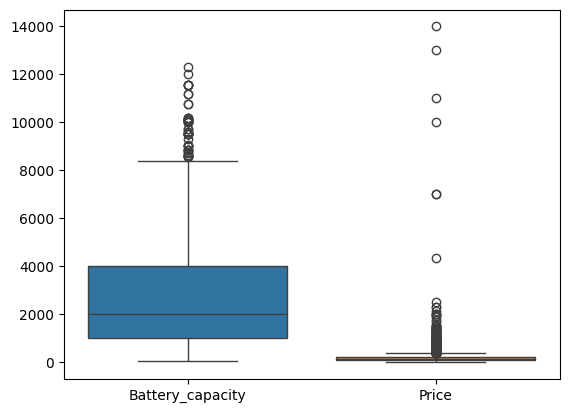

In [222]:
#visualazing outliers using boxplot
sns.boxplot(features)

In [223]:
#removing outliers using IQR
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
features = features[(features <= upper) & (features >= lower)].dropna()
features

,Battery_capacity,Price
0,2000.0,60.0
1,3000.0,170.0
2,3000.0,230.0
3,4000.0,150.0
4,1000.0,150.0
...,...,...
5905,1000.0,150.0
5906,1000.0,150.0
5907,690.0,150.0
5908,5000.0,150.0


In [224]:
features.isnull().sum()

Battery_capacity    0
Price               0
dtype: int64

In [225]:
features.describe()

,Battery_capacity,Price
count,5378.000000,5378.000000
mean,2331.798438,153.190219
std,1580.810309,76.332588
min,80.000000,0.000000
25%,1000.000000,100.000000
50%,2000.000000,150.000000
75%,3200.000000,190.000000
max,8400.000000,386.000000


In [226]:
#scale data using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[0.23076923, 0.15544041],
       [0.35096154, 0.44041451],
       [0.35096154, 0.59585492],
       ...,
       [0.07331731, 0.38860104],
       [0.59134615, 0.38860104],
       [0.44711538, 0.38860104]])

In [227]:
#use kmeans to attribute a number as cluster label to each row of data
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [228]:
features['Cluster'] = kmeans.labels_
features


,Battery_capacity,Price,Cluster
0,2000.0,60.0,1
1,3000.0,170.0,2
2,3000.0,230.0,0
3,4000.0,150.0,2
4,1000.0,150.0,4
...,...,...,...
5905,1000.0,150.0,4
5906,1000.0,150.0,4
5907,690.0,150.0,4
5908,5000.0,150.0,2


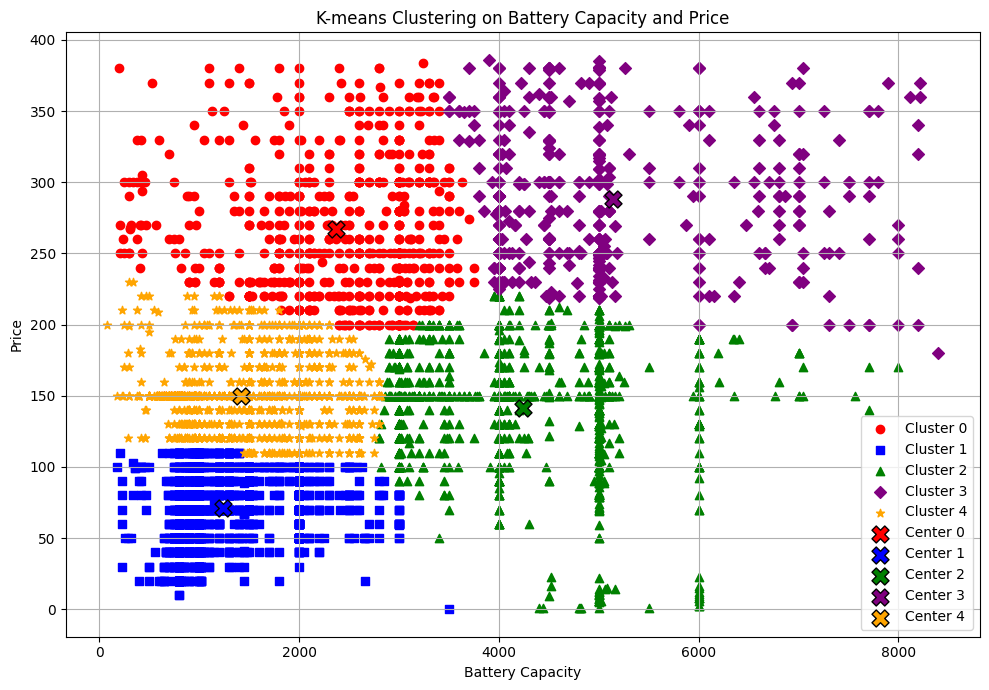

In [229]:

plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'purple', 'orange']
markers = ['o', 's', '^', 'D', '*']

for cluster_id in range(5):
    cluster_data = features[features['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Battery_capacity'], cluster_data['Price'], 
                color=colors[cluster_id], marker=markers[cluster_id], label=f'Cluster {cluster_id}')
    
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
for idx, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], color=colors[idx], edgecolor='black', 
                marker='X', s=150, label=f'Center {idx}')

  
plt.title('K-means Clustering on Battery Capacity and Price')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h4 dir='rtl'>
کاهش WCSS در ابتدا سریع است، اما از حدود 
k=5 کندتر می‌شوند.
البته در k=3 هم کاهش دیده‌ می‌شود و این مقدار هم می‌تواند مقدار خوبی برای k باشد.
</h4>
<h4 dir='rtl'>
امتیاز Silhouette برای 
k=2 بالاترین مقدار (حدود 0.48) را دارد.
</h4>

<h4 dir='rtl'>
با این حال، امتیاز 
Silhouette برای 
k=3 نیز نسبتاً بالا است (حدود 0.48) و می‌تواند به عنوان مقدار مناسبی برای 
k در نظر گرفته شود.
مقدار 
k=5 (حدود 0.42)
هم همچنان می‌تواند قابل بررسی باشد.
</h4>

<h4 dir='rtl'>
برای بدست اوردن نتایج دقیقتر از روش های دیگر در ادامه استفاده شده است.
</h4>

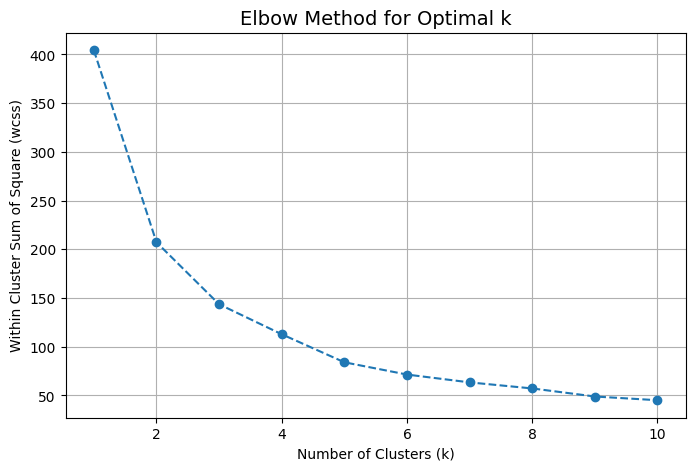

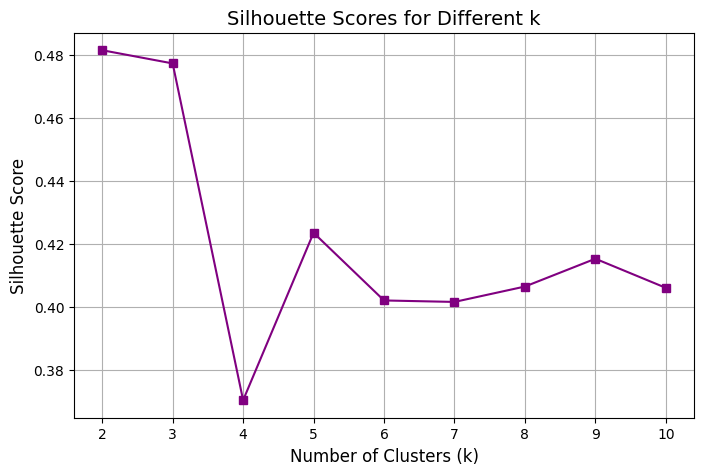

In [230]:
wcss=[]
silhouette_scores=[]

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

    if k > 1:
        silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Cluster Sum of Square (wcss)')
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='s', linestyle='-', color='purple')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Scores for Different k', fontsize=14)
plt.grid(True)
plt.show()

<h4 dir='rtl'>
یکی از روش‌های دیگر که می‌توان استفاده کرد، 
Davies-Bouldin Index
است. این روش بر مبنای فاصله‌ی بین خوشه‌ها و فاصله‌ی نقاط هر خوشه محاسبه می‌شود.
به طور کلی این ضاخص میانگین معیارهای شباهت هر خوشه با خوشه‌ای که بیشترین شباهت را به آن دارد، می‌باشد
بهترین انتخاب برای خوشه‌ها زمانی است که میانگین شباهت کمینه شود
بنابراین هرچه این مقدار کمتر باشد، تعداد خوشه‌ها مناسب تر هستند.
</h4>

<h4 dir='rtl'>
مطابق شکل زیر می‌توان به راحتی و با اطمینان بیشتر نتیجه گرفت که 
k=5
بهترین مقدار برای تعداد خوشه‌ها می‌باشد.
</h4>

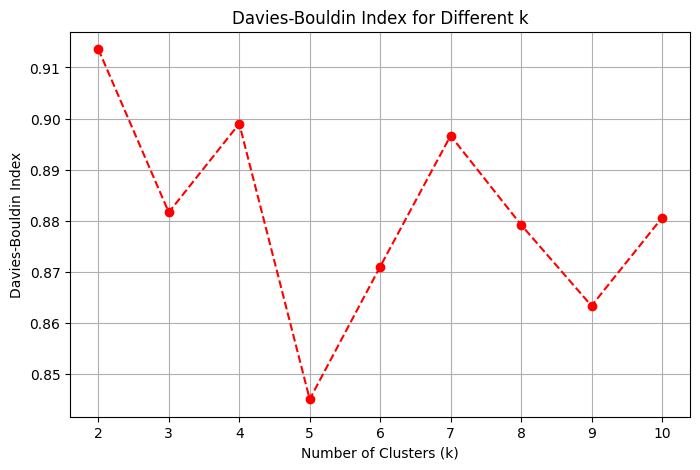

In [231]:

db_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    db_score = davies_bouldin_score(scaled_features, labels)
    db_scores.append(db_score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), db_scores, marker='o', linestyle='--', color='red')
plt.title('Davies-Bouldin Index for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.grid()
plt.show()